 **Importing neccessary Libaries**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import urllib.request
import os

**Download the dataset**

In [ ]:
def download_dataset():
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data"
    filename = "magic04.data"

    if not os.path.exists(filename):
        print("Downloading dataset...")
        urllib.request.urlretrieve(url, filename)
        print("Dataset downloaded successfully!")
    else:
        print("Dataset already exists!")


**Load the Magic Gamma Telescope dataset**

In [ ]:
def load_data():
    # First, download the dataset if it doesn't exist
    download_dataset()

    # Load the dataset
    column_names = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1',
                    'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
    data = pd.read_csv('magic04.data', names=column_names)

    # Convert 'g' (gamma) to 1 and 'h' (hadron) to 0
    data['class'] = (data['class'] == 'g').astype(int)

    # Split features and target
    X = data.drop('class', axis=1).values
    y = data['class'].values

    return X, y, data  # Return the DataFrame as well for printing

# Load the data and print the dataset
X, y, dataset = load_data()
print(dataset)

Dataset already exists!
        fLength    fWidth   fSize   fConc  fConc1     fAsym   fM3Long  \
0       28.7967   16.0021  2.6449  0.3918  0.1982   27.7004   22.0110   
1       31.6036   11.7235  2.5185  0.5303  0.3773   26.2722   23.8238   
2      162.0520  136.0310  4.0612  0.0374  0.0187  116.7410  -64.8580   
3       23.8172    9.5728  2.3385  0.6147  0.3922   27.2107   -6.4633   
4       75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277   28.5525   
...         ...       ...     ...     ...     ...       ...       ...   
19015   21.3846   10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   
19016   28.9452    6.7020  2.2672  0.5351  0.2784   37.0816   13.1853   
19017   75.4455   47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562   
19018  120.5135   76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224   
19019  187.1814   53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558   

       fM3Trans   fAlpha     fDist  class  
0       -8.2027  40.0920   81.8828      1  
1       -9.

**Creating ANN Model with 1 input, 2 hidden, 1 output layers.**

In [ ]:
def create_model(activation_function):
    model = Sequential([
        Dense(1, input_dim=10),  # Input layer
        Dense(64, activation=activation_function),  # First hidden layer
        Dense(32, activation=activation_function),  # Second hidden layer
        Dense(1, activation=activation_function)  # Output layer
    ])

    model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
    return model

**Training**

In [ ]:

def train_and_evaluate(X, y, activation_function):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create and train the model
    model = create_model(activation_function)
    history = model.fit(X_train_scaled, y_train,
                       epochs=50,
                       batch_size=32,
                       validation_split=0.2,
                       verbose=1)

    # Evaluate the model
    y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)
    accuracy = accuracy_score(y_test, y_pred)

    return history, accuracy, model

def plot_training_history(histories, activation_functions):
    plt.figure(figsize=(12, 5))

    # Plot training accuracy
    plt.subplot(1, 2, 1)
    for hist, act_func in zip(histories, activation_functions):
        plt.plot(hist.history['accuracy'], label=f'{act_func}')
    plt.title('Training Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot validation accuracy
    plt.subplot(1, 2, 2)
    for hist, act_func in zip(histories, activation_functions):
        plt.plot(hist.history['val_accuracy'], label=f'{act_func}')
    plt.title('Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

**Main Execution**

Loading data...
Dataset already exists!
Data loaded successfully!

Training with sigmoid activation function:
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


381/381 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6664 - loss: 0.6246 - val_accuracy: 0.7388 - val_loss: 0.5307
Epoch 2/50
381/381 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7600 - loss: 0.5024 - val_accuracy: 0.7802 - val_loss: 0.4796
Epoch 3/50
381/381 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7884 - loss: 0.4691 - val_accuracy: 0.7878 - val_loss: 0.4725
Epoch 4/50
381/381 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7884 - loss: 0.4616 - val_accuracy: 0.7907 - val_loss: 0.4706
Epoch 5/50
381/381 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7913 - loss: 0.4655 - val_accuracy: 0.7917 - val_loss: 0.4652
Epoch 6/50
381/381 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7930 - loss: 0.4575 - val_accuracy: 0.7930 - val_loss: 0.4637
Epoch 7/50
381/381 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7981 - loss: 0.4535 - val_accuracy: 0.7884 - val_loss: 0.4640
Epoch 8/50
381/381 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7941 - loss: 0.4557 - val_accuracy: 0.7920 - val_

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


381/381 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6177 - loss: 1.5380 - val_accuracy: 0.7083 - val_loss: 0.5967
Epoch 2/50
381/381 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7198 - loss: 0.6057 - val_accuracy: 0.7457 - val_loss: 0.6054
Epoch 3/50
381/381 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7462 - loss: 0.5590 - val_accuracy: 0.7635 - val_loss: 0.6741
Epoch 4/50
381/381 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7642 - loss: 0.5621 - val_accuracy: 0.7773 - val_loss: 0.5157
Epoch 5/50
381/381 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7622 - loss: 0.5425 - val_accuracy: 0.7865 - val_loss: 0.4895
Epoch 6/50
381/381 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7863 - loss: 0.4910 - val_accuracy: 0.7920 - val_loss: 0.4988
Epoch 7/50
381/381 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7887 - loss: 0.4763 - val_accuracy: 0.7940 - val_loss: 0.5008
Epoch 8/50
381/381 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7945 - loss: 0.4834 - val_accuracy: 0.7920 - val_

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


381/381 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4187 - loss: 1.2297 - val_accuracy: 0.6505 - val_loss: 0.6733
Epoch 2/50
381/381 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6564 - loss: 0.6610 - val_accuracy: 0.6544 - val_loss: 0.6578
Epoch 3/50
381/381 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6483 - loss: 0.6540 - val_accuracy: 0.6685 - val_loss: 0.6302
Epoch 4/50
381/381 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6796 - loss: 0.6248 - val_accuracy: 0.7073 - val_loss: 0.5893
Epoch 5/50
381/381 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7110 - loss: 0.5839 - val_accuracy: 0.7392 - val_loss: 0.5553
Epoch 6/50
381/381 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7273 - loss: 0.6006 - val_accuracy: 0.7457 - val_loss: 0.5213
Epoch 7/50
381/381 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7429 - loss: 0.5228 - val_accuracy: 0.7648 - val_loss: 0.5077
Epoch 8/50
381/381 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7604 - loss: 0.5098 - val_accuracy: 0.7723 - val_

/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


381/381 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5094 - loss: 1.0183 - val_accuracy: 0.6787 - val_loss: 0.6128
Epoch 2/50
381/381 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6777 - loss: 0.6103 - val_accuracy: 0.6853 - val_loss: 0.6046
Epoch 3/50
381/381 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6727 - loss: 0.6114 - val_accuracy: 0.7198 - val_loss: 0.5725
Epoch 4/50
381/381 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7228 - loss: 0.5699 - val_accuracy: 0.7658 - val_loss: 0.5206
Epoch 5/50
381/381 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7474 - loss: 0.5338 - val_accuracy: 0.7714 - val_loss: 0.5150
Epoch 6/50
381/381 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7583 - loss: 0.5276 - val_accuracy: 0.7914 - val_loss: 0.4981
Epoch 7/50
381/381 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7785 - loss: 0.4860 - val_accuracy: 0.8022 - val_loss: 0.5029
Epoch 8/50
381/381 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7833 - loss: 0.5010 - val_accuracy: 0.8042 - val_

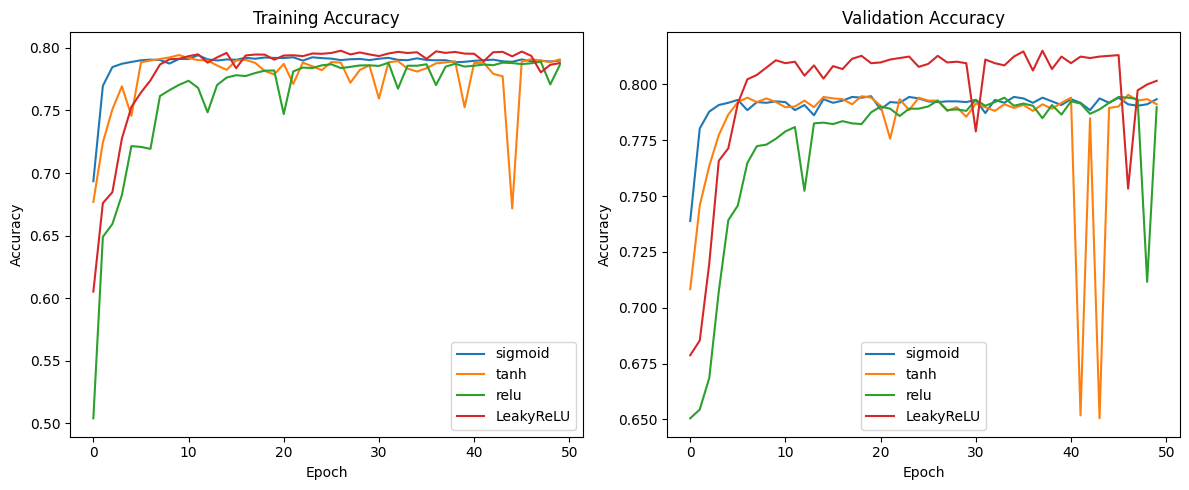


Final Results:
sigmoid: 0.7918
tanh: 0.7907
relu: 0.7910
LeakyReLU: 0.7984


In [ ]:
# Main execution
def main():
    # Load data
    print("Loading data...")
    X, y = load_data()
    print("Data loaded successfully!")

    # Define activation functions to test
    activation_functions = ['sigmoid', 'tanh', 'relu', 'LeakyReLU']
    histories = []
    results = {}

    # Train and evaluate models with different activation functions
    for activation in activation_functions:
        print(f"\nTraining with {activation} activation function:")

        if activation == 'LeakyReLU':
            # For LeakyReLU, we need to use it differently due to its parameters
            history, accuracy, model = train_and_evaluate(X, y, tf.keras.layers.LeakyReLU(alpha=0.01))
        else:
            history, accuracy, model = train_and_evaluate(X, y, activation)

        histories.append(history)
        results[activation] = accuracy
        print(f"Test Accuracy: {accuracy:.4f}")

    # Plot training histories
    plot_training_history(histories, activation_functions)

    # Print final comparison
    print("\nFinal Results:")
    for activation, accuracy in results.items():
        print(f"{activation}: {accuracy:.4f}")

if __name__ == "__main__":
    main()